Trying to predict insurance cost

Data: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = pd.read_csv('insurance.csv')

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 432x432 with 0 Axes>

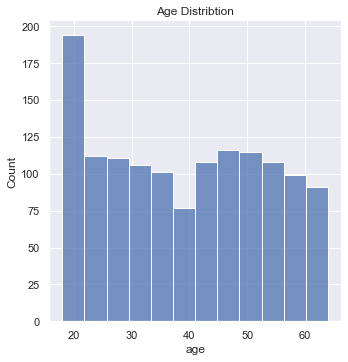

In [8]:
# distribtion of age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['age'])
plt.title("Age Distribtion")
plt.show()

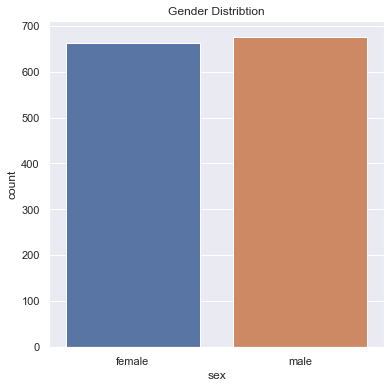

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x=dataset['sex'])
plt.title("Gender Distribtion")
plt.show()

In [13]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

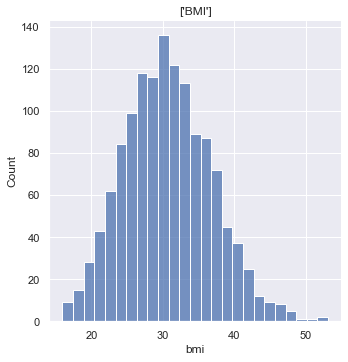

In [24]:
plt.figure(figsize=(6,6))
sns.displot(dataset['bmi'])
plt.title(['BMI'])
plt.show()

<Figure size 432x432 with 0 Axes>

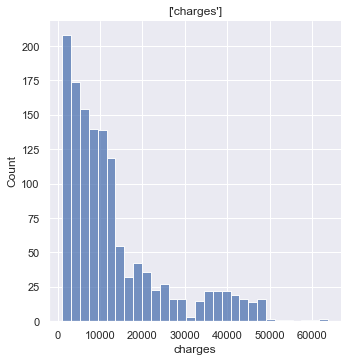

In [25]:
plt.figure(figsize=(6,6))
sns.displot(dataset['charges'])
plt.title(['charges'])
plt.show()

Explore Categorical Data

Sex, Smoker, region

In [26]:
# encoding categorical data
dataset.replace({"sex":{"male":0,'female':1}},inplace=True)
dataset.replace({"region":{"southeast":0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
dataset.replace({"smoker":{"yes":0,'no':1}},inplace=True)


In [27]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [28]:
X=dataset.drop('charges',axis=1)
Y=dataset['charges']

In [33]:
#Splitting the data 
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [34]:
#create the model
model=LinearRegression()


In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
train_pred=model.predict(x_train)
train_acc=metrics.r2_score(y_train,train_pred)
train_acc

0.7413131194887537

In [39]:
test_pred=model.predict(x_test)
test_acc=metrics.r2_score(test_pred,y_test)
test_acc

0.7071565853745312